# Exercise 2

## Part I: KNN Classifier

In this exercise we implement the KNN for classification of the Iris dataset

First, understand the dataset and its contents by finding the keys and reading the description of the dataset by running the code block below 

In [1]:
from sklearn.datasets import load_iris
iris_dataset=load_iris() #creates an object that contains the iris dataset
print('Keys of the iris_dataset is:', iris_dataset.keys())

Keys of the iris_dataset is: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [2]:
print(iris_dataset.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

A) Classify the Iris species with KNN approach using the first two feature only (X_train[:, : 2], X_test[:, : 2]), and check the accuracy as K changes. Let K takes the values [1, 5, 10, 15]. No need to scale features.
In the code, use random_state=100 in train_test_split as below.

Plot the accuracy and comment on your result

[73.68421052631578, 84.21052631578947, 84.21052631578947, 76.31578947368422]


Text(0.5,1,'Trade off between k Values and KNN Accuracy')

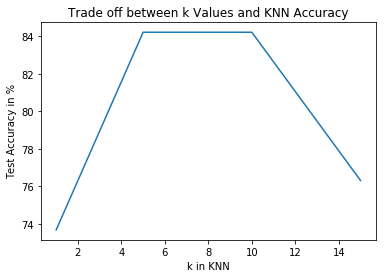

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


test_accuracy=[] # you can use the .append to test_accuracy to store the result
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=100)

K_values = [1,5,10,15]
for k in K_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train[:,0:2],Y_train)
    Accuracy = knn.score(X_test[:,0:2],Y_test)
    test_accuracy.append(Accuracy*100)
print(test_accuracy)

plt.plot(K_values, test_accuracy)
plt.xlabel('k in KNN')
plt.ylabel('Test Accuracy in %')
plt.title('Trade off between k Values and KNN Accuracy')

#Comments: 
#The curve shows an initial increase as K becomes larger. 
#Before the decrease in accuracy, there is a stable region for the accuracy as k increases from 5 to 10.
#The initial improving in accuracy is led by the lower variance due to growing K.
#The later deceasing accuray is caused by the increased bias as k keeps growing.
#We are supposed to choose a suitable k as our KNN approach in the flat region where k is roughly from 5 to 10.

B) Use the Iris example, and find the accuracy of the KNN approach with K=5 when different number of features is used without scaling. 
Hint: To use N_features only from training data use: X_train[:, : N_features ]
Write down the accuracy when using one, two, three, and the four features


In [5]:
test_accuracy=[] # you can use the .append to test_accuracy to store the result
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=100)
k = 5
for i in range(4):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train[:,0:i+1],Y_train)
    Accuracy = knn.score(X_test[:,0:i+1],Y_test)
    test_accuracy.append(Accuracy*100)

for i in range(4):
    print('The accuracy is {:.3f} % when using {} feature(s)'.format(test_accuracy[i],i+1))

The accuracy is 78.947 % when using 1 feature(s)
The accuracy is 84.211 % when using 2 feature(s)
The accuracy is 92.105 % when using 3 feature(s)
The accuracy is 97.368 % when using 4 feature(s)


C) Repeat B when feature scaling with MinMaxScaler is used

In [2]:
test_accuracy=[] # you can use the .append to test_accuracy to store the result
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=100)
k = 5
for i in range(4):
    knn = KNeighborsClassifier(n_neighbors = k)
    
    scaler = preprocessing.MinMaxScaler().fit(X_train[:,0:i+1])
    X_train_tf = scaler.transform(X_train[:,0:i+1])
    X_test_tf = scaler.transform(X_test[:,0:i+1])
    
    knn.fit(X_train_tf,Y_train)
    Accuracy = knn.score(X_test_tf,Y_test)
    test_accuracy.append(Accuracy*100)

for i in range(4):
    print('With feature scaling, the accuracy is {:.3f}% when using {} feature(s)'.format(test_accuracy[i],i+1))

NameError: name 'iris_dataset' is not defined

## Part 2: Linear Regression

2-A) With the advertising dataset, use the statsmodels module in python to find the P-value of the TV feature and its associated confidence interval. Does the confidence interval include the value of Zero? What does that imply. Comment on the association between the TV and sales.

In [3]:
from pandas import read_csv
import statsmodels.formula.api as smf
AdvertisingData=read_csv('Advertising.csv')
#X_TV = np.array([AdvertisingData['TV']])
#y_Sales = np.array([AdvertisingData['Sales']])
model = smf.ols(formula = 'Sales ~ TV', data = AdvertisingData).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 29 Sep 2018   Prob (F-statistic):           1.47e-42
Time:                        10:27:54   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2-B) Using the Scikit-Learn library, fit a linear regression model using advertising trianing set, then find the mean square error of the fitted model using test data. Use random_state= 0 in the train_test_split function.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

AdvertisingData=read_csv('Advertising.csv')

X = AdvertisingData[['Radio', 'TV','Newspaper']].values

Y = AdvertisingData['Sales']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)
LR = LinearRegression()
LR.fit(X_train,Y_train)
L = ['Radio','TV','Newspaper']

#print(LR.coef_)
#print(LR.intercept_)
Y_pred = LR.predict(X_test)
#mean_squared_error(Y_test,Y_pred)

for i in range(3):
    print('The coefficient for {} is {:.3f}.'.format(L[i],LR.coef_[i]))
print('The intercept for this fitted model is {:.3f}.'.format(LR.intercept_))
print('The mean squared error for this fitted model is {:.3f}.'.format(mean_squared_error(Y_test,Y_pred)))

The coefficient for Radio is 0.199.
The coefficient for TV is 0.044.
The coefficient for Newspaper is 0.001.
The intercept for this fitted model is 2.893.
The mean squared error for this fitted model is 4.012.


In [5]:
print(LR.intercept_.shape)

()


In [ ]:
print('sales = {}*radio + {}*TV + {}*Newspaper + {}'.format(LR.coef_[1],LR.coef_[2],LR.coef_[3]))